In [1]:
import os
import sys
from pathlib import Path
import xml.etree.ElementTree as ET

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
trajlogpath = r'/home/mengcz/trafficsimdata/ringroad3/0/tempconf_0.traj.route_main.csv'
trajdf = pd.read_csv(trajlogpath, header=None, comment='#')

In [3]:
trace = trajdf[trajdf[8] == 1]
trace

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2,1,974.7,20.2084,0.51736,60.64,0.164293,FAST_TYPE,1,1,1,1970-01-01T00:00:00Z,974.7086,
87,0.4,1,978.8,20.3103,0.50929,60.60,0.255006,FAST_TYPE,1,1,1,1970-01-01T00:00:00Z,978.7605,
174,0.6,1,982.8,20.4104,0.50054,60.54,0.350362,FAST_TYPE,1,1,1,1970-01-01T00:00:00Z,982.8325,
261,0.8,1,986.9,20.5086,0.49113,60.46,0.449637,FAST_TYPE,1,1,1,1970-01-01T00:00:00Z,986.9244,
348,1.0,1,991.0,20.6048,0.48104,60.35,0.552170,FAST_TYPE,1,1,1,1970-01-01T00:00:01Z,991.0358,
435,1.2,1,995.2,20.6989,0.47027,60.23,0.657360,FAST_TYPE,1,1,1,1970-01-01T00:00:01Z,995.1662,
522,1.4,1,999.3,20.7906,0.45883,60.09,0.764660,FAST_TYPE,1,1,1,1970-01-01T00:00:01Z,999.3151,
721,1.8,1,7.7,20.9668,0.43388,59.74,0.983635,FAST_TYPE,1,1,1,1970-01-01T00:00:01Z,7.6669,
808,2.0,1,11.9,21.0508,0.42037,59.53,1.094431,FAST_TYPE,1,1,1,1970-01-01T00:00:02Z,11.8686,
895,2.2,1,16.1,21.1321,0.40616,59.30,1.205563,FAST_TYPE,1,1,1,1970-01-01T00:00:02Z,16.0869,


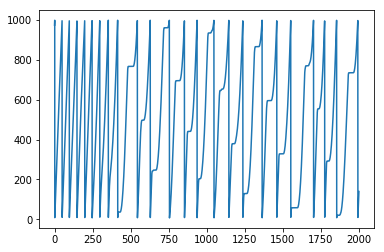

In [6]:
# plt.figure()
plt.plot(trace[0], trace[2])
plt.show()
# plt.figure()
# plt.plot(trace[0][2000:2800], trace[3][2000:2800])
# plt.figure()
# plt.plot(trace[0][2000:2800], trace[4][2000:2800])

In [5]:
# parse xml config
tree = ET.parse('/home/mengcz/movsim/sim/exp/ringroad_2lanes.xprj')
root = tree.getroot()
for child in root:
    print(child.tag, child.attrib)
simconf = root.find('Scenario').find('Simulation')
simconf.set('seed', '{}'.format(114514))
tree.write(sys.stdout)

VehiclePrototypes {}
Scenario {'network_filename': 'ringroad_2lanes.xodr', 'initial_conditions_filename': 'ringroad_initialConditions.xml'}
<Movsim>
    <VehiclePrototypes>
        
        <VehiclePrototypeConfiguration label="FAST_TYPE" length="6" maximum_deceleration="9">
            <AccelerationModelType>
                <ModelParameterIDM T="1" a="0.7" b="3.0" delta="4" s0="3" s1="0" v0="35" />
            </AccelerationModelType>
            <LaneChangeModelType crit_speed_eur="20" european_rules="false">
                <ModelParameterMOBIL minimum_gap="2.0" politeness="0.1" right_bias_acceleration="0.3" safe_deceleration="6.0" threshold_acceleration="0.15" />
            </LaneChangeModelType>
        </VehiclePrototypeConfiguration>
        
        <VehiclePrototypeConfiguration label="SLOW_TYPE" length="15" maximum_deceleration="9">
            <AccelerationModelType>
                <ModelParameterIDM T="1.2" a="0.5" b="3.0" delta="4" s0="3" s1="0" v0="25" />
            <